Generate a list of size random samples, obeying the distribution custDist
suggests random samples between x0 and x1 and accepts the suggestion with probability custDist(x)
custDist noes not need to be normalized. Add this condition to increase performance. 
Best performance for max_{x in [x0,x1]} custDist(x) = 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def random_custDist(x0,x1,custDist,size=None, nControl=10**6):
    samples=[]
    nLoop=0
    while len(samples)<size and nLoop<nControl:
        x=np.random.uniform(low=x0,high=x1)
        prop=custDist(x)
        assert prop>=0 and prop<=1
        if np.random.uniform(low=0,high=1) <=prop:
            samples += [x]
        nLoop+=1
    return samples

In [3]:
def custDist(x):
    if x<2010:
        return .3
    else:
        return (np.exp(x-2008)-1)/(np.exp(2019-2007)-1)

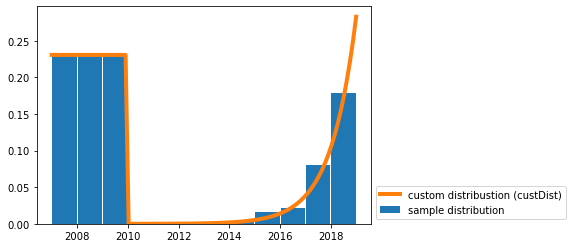

In [4]:
x0=2007
x1=2019
samples=random_custDist(x0,x1,custDist=custDist,size=1000)
#print(samples)

#hist plot
bins=np.linspace(x0,x1,int(x1-x0+1))
hist=np.histogram(samples, bins )[0]
hist=hist/np.sum(hist)
plt.bar( (bins[:-1]+bins[1:])/2, hist, width=.96, label='sample distribution')

#dist
grid=np.linspace(x0,x1,100)
discCustDist=np.array([custDist(x) for x in grid]) #distrete version
discCustDist*=1/(grid[1]-grid[0])/np.sum(discCustDist)
plt.plot(grid,discCustDist,label='custom distribustion (custDist)', color='C1', linewidth=4)

#decoration
plt.legend(loc=3,bbox_to_anchor=(1,0))
plt.show()
plt.close()